# 딥러닝 구조 연습

* 섭씨 -> 화씨
* 공식: T(화씨) = T(섭씨) * 9/5 + 32
* 섭씨와 화씨의 관계는 위의 공식에 의해 이미 알고 있는 내용이다.
* 텐서플로우는 썹씨와 화씨의 데이터를 통해 어떤 방정식을 만들어 내는지 알아봅시다.

In [1]:
import tensorflow
tensorflow.__version__

'2.10.0'

## 딥러닝 구성하는 순서

신경망 생성 -> 모델 compile -> 모델 fit (훈련)-> 모델 predict (예측)-> 모델 저장(save)

## 라이브러리 로드

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

## 데이터 로드

In [3]:
temp_df = pd.read_csv('./data/Celsius-to-Fahrenheit.csv')
temp_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [4]:
temp_df.info() # 30 entries : 30개 데이터. 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


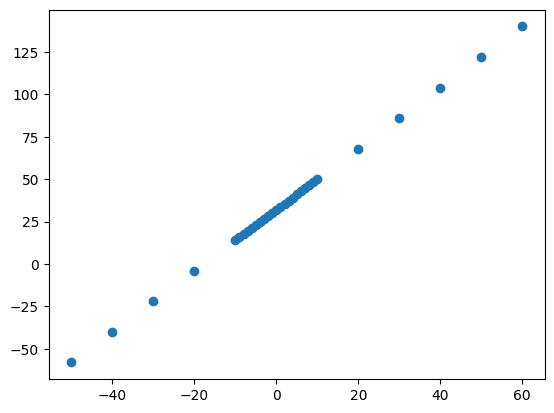

In [7]:
plt.scatter(temp_df['Celsius'], temp_df['Fahrenheit'])
plt.show()

In [ ]:
# 딥러닝은 이 관계를 어떻게 표현할지 알아보자

## 데이터 준비

In [4]:
# 컬럼 추출해서 변수에 할당
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

In [10]:
# 데이터 준비했으면 쉐입, 차원, 타입 확인
x_train.shape # 30행 1열구조.=> 30개의 샘플이 1가지 피처에 대한 내용

(30,)

In [9]:
y_train.shape

(30,)

## 딥러닝 구성하기

model = Sequential() :  입력층, 은닉층, 출력층을 차곡차곡 쌓아서 순서대로 실행되도록 하는 모델 생성

```python
Dense(노드 갯수, input_dim=입력 갯수)
```


**[참고]**
tensorflow에서 모델을 생성하는 방법
1. Sequential : 해결하려는 문제들에 대해서 95%정도 처리가 가능
2. Functional : Sequential한 방법으로도 해결되지 않을 경우에 적용
3. Subclass Google에서도 추천하지 않는 방법, 모델을 실제로 깊이 있게 연구하는 사람

In [ ]:
# 시퀀셜 객체 만들고 덴스 층을 추가, 추가 하는 형태로 네트워크 구성

In [5]:
# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
# 딥러닝 모델 생성

model = Sequential()
# 레이어를 추가해서 차례로 시퀀셜할수있는 박스를 하나 만든다
# =모델이라는 시퀀셜 객체 생성

In [6]:
model.add(Dense(units = 1, input_dim=1)) 
# Dense : 이 층이 노드를 몇개 만들거니. 입력은 몇 차원이니. 쉐입이 무엇이니 지정.
# units = 1 : 1만 표기해도 됨
# input_dim=1 : 1차원

In [ ]:
#입력1개, 유닛1개인 Dense층 구성
# model.add(Dense(units=1, input_shape=[1]))

## 딥러닝 설정하기

* 지정한 모델이 효과적으로 구현될 수 있게 환경을 설정해주는 부분
* 손실함수, 경사하강법,평가지표 등의 정보 설정


* 오차를 어떻게 측정할껀데? 손실함수
* 오차를 가중치에 어떻게 적용할껀데? 경사하강법

In [7]:
# 딥러닝을 설정합니다.
# 회귀이기 때문에 손실함수는 MSE : loss=
# 경사하강법은 일반적으로 성능이 제일 좋다는 아담. : optimizer=

# model.compile(loss='mean_squared_error', optimizer='Adam') # 기본 학습률 : 0.001 
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.5)) # 좀 더 성큼성큼학습 

## 딥러닝 훈련하기

In [8]:
# epochs = 모든 샘플에 대해 한 번 훈련하는 것을 1에포크, 모든 샘플을 100번 재사용해서 훈련하라

epoch_hist = model.fit(x_train, y_train, epochs=100)

# 30개의 샘플을 1번 훈련하는 것을 1에포크
# => 100에포크는 100번 훈련

# 훈련을 거듭하면서 loss가 줄어듬

Epoch 1/100
1/1 [==============================] - 0s 227ms/step - loss: 1236.9963
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 997.2269
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 986.4747
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 1022.6540
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 984.2699
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 905.9609
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 840.3104
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 810.8709
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 806.2981
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 797.5624
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 768.0865
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 723.4908
Epoch 13/100
1/1 [===============

In [ ]:
# batch_size = 샘플을 한 번에 몇 개씩 처리할 것인지 정하는 부분, 30개 샘플 중에서 10개씩 끊어서 집어넣어라.
# batch_size가 너무 크면 속도 저하, 너무 작으면 실행 값의 편차가 생겨 불안정해짐.

# epoch_hist = model.fit(x_train, y_train, epochs=100,batch_size=10)

In [18]:
#학습끝나고
#평가하자
epoch_hist.history.keys()

dict_keys(['loss'])

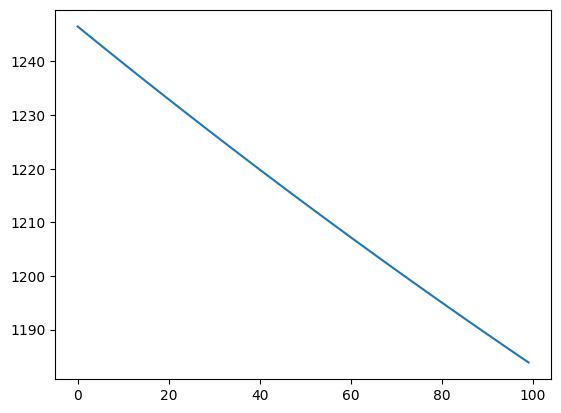

In [21]:
plt.plot(epoch_hist.history['loss']) # 학습 1
plt.show()

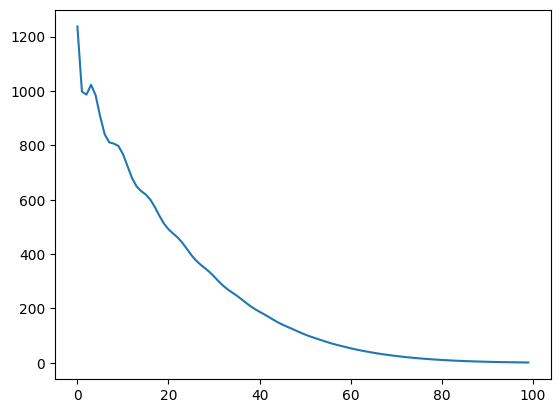

In [12]:
plt.plot(epoch_hist.history['loss']) # 학습 2
plt.show()

## 평가하기

In [22]:
model.evaluate(x_train, y_train) # 오차가 너무 크다 #100에포크이지만 학습이 제대로 이루어지지않음 # 학습1 : 로스 2400대

1/1 [==============================] - 0s 89ms/step - loss: 1183.2930


1183.29296875

In [13]:
model.evaluate(x_train, y_train) # 학습 2

1/1 [==============================] - 0s 20ms/step - loss: 1.3020


1.301967978477478

## 예측하기

In [14]:
#T(화씨) = T(섭씨) * 9/5 + 32
Temp_c = 0 # 테스트용

pred_temp = model.predict([Temp_c]) # 예측값
# 데이터 쉐입 맞추기! : 1차원으로 만들어줌

real_temp = Temp_c * (9/5) + 32 # 실제 값

pred_temp, real_temp # 오차가 크다 = 학습이 덜되었다!


1/1 [==============================] - 0s 35ms/step


(array([[30.855825]], dtype=float32), 32.0)

## 전체 코드

In [ ]:
# 라이브러리 로드

# 데이터 로드

# 딥러닝 모델 생성

# 설정

# 훈련

# 평가

# 예측

Epoch 1/100
1/1 [==============================] - 0s 200ms/step - loss: 3674.9683
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 2606.7317
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 1802.9143
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 1259.7075
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 959.6390
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 865.2393
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 916.2538
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 1037.0266
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 1155.4338
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 1222.4550
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 1219.3837
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 1152.0944
Epoch 13/100
1/1 [========

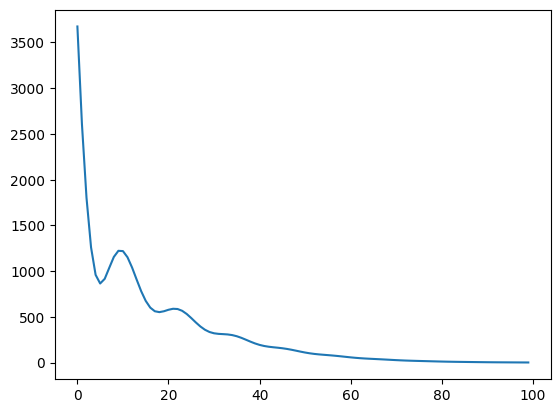

1/1 [==============================] - 0s 51ms/step


(array([[30.77168]], dtype=float32), 32.0)

In [15]:
# 라이브러리 로드
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential # 딥러닝 구동에 필요한 케라스 함수
from tensorflow.keras.layers import Dense,Flatten

# 데이터 로드
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']


# 딥러닝 모델 생성
model = Sequential()
model.add(Dense(units = 1, input_dim=1)) 

# 설정
# model.compile(loss='mean_squared_error', optimizer='Adam') # 기본 학습률 : 0.001 
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.5)) # 설정 변경: 성큼성큼학습 

# 훈련 (=학습 =train)
epoch_hist = model.fit(x_train, y_train, epochs=100)

# *시각화는 참고사항
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'])
plt.show()

# 평가 : loss 측정
model.evaluate(x_train, y_train)

# 예측 (=test)
Temp_c = 0 # 테스트용
pred_temp = model.predict([Temp_c]) # 예측값 # 데이터 shape을 1차원으로 맞춰준다는 점 주의!
real_temp = Temp_c * (9/5) + 32 # 실제 값 #T(화씨) = T(섭씨) * 9/5 + 32
pred_temp, real_temp # 오차가 크다 = 학습이 덜되었다!


In [ ]:
# 라이브러리 로드
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential # 딥러닝 구동에 필요한 케라스 함수
from tensorflow.keras.layers import Dense,Flatten

# 데이터 로드
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']


# 딥러닝 모델 생성
model = Sequential()
model.add(Dense(units = 1, input_dim=1)) 

# 설정
# model.compile(loss='mean_squared_error', optimizer='Adam') # 기본 학습률 : 0.001 
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.5)) # 설정 변경: 성큼성큼학습 

# 훈련 (=학습 =train)
epoch_hist = model.fit(x_train, y_train, epochs=100)

# *시각화는 참고사항
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'])
plt.show()

# 평가 : loss 측정
model.evaluate(x_train, y_train)

# 예측 (=test)
Temp_c = 0 # 테스트용
pred_temp = model.predict([Temp_c]) # 예측값 # 데이터 shape을 1차원으로 맞춰준다는 점 주의!
real_temp = Temp_c * (9/5) + 32 # 실제 값 #T(화씨) = T(섭씨) * 9/5 + 32
pred_temp, real_temp # 오차가 크다 = 학습이 덜되었다!

In [ ]:
# 종합코드 완전체

In [18]:
# 라이브러리 로드
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential # 딥러닝 구동에 필요한 케라스 함수
from tensorflow.keras.layers import Dense,Flatten

# 데이터 로드
temp_df = pd.read_csv('./data/Celsius-to-Fahrenheit.csv')
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

# 딥러닝 모델 생성
model = Sequential()
# 입력1개, 유닛1개인 Dense층 구성 : 섭씨데이터가 하나씩 들어가서 층을 구성
model.add(Dense(units = 1, input_dim=1)) 

# 설정 : loss 회귀방정식과 같기때문에 숫자 예측하려고 mean~로 설정.  예측값과 실제값의 오차의 정도에 따라 가중치를 업데이트하며 오차를 줄여가는 방향으로 학습해간다.
# model.compile(loss='mean_squared_error', optimizer='Adam') # 기본 학습률 : 0.001 
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.5)) # 설정 변경: 성큼성큼학습 
# 경사하강법 종류가 있는데 Adam을 사용하는 것을 기억해라.

# 훈련 (=학습 =train) : 딥러닝에 들어와서는 학습반복횟수 에포크를 지정해줌.
epoch_hist = model.fit(x_train, y_train, epochs=100)

# 평가 : loss 측정
model.evaluate(x_train, y_train)
# --------------
# 예측 (=test) : 섭씨 0도를 넣으면 화씨 몇도일까?
Temp_c = 0 # 테스트용 
Temp_f = model.predict([Temp_c]) # 예측값 # 입력데이터의 shape을 고려:  1차원으로 맞춰준다는 점 주의!
print("predict={} real={}".format(Temp_f, 9/5*Temp_c + 32))


Epoch 1/100
1/1 [==============================] - 0s 197ms/step - loss: 1666.2950
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 1186.4634
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 965.8021
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 954.0211
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 1029.3284
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 1067.0089
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 1028.7626
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 940.4608
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 842.5363
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 766.5225
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 726.8108
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 719.0000
Epoch 13/100
1/1 [============

## 성능향상

In [2]:
# 라이브러리 로드
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential # 딥러닝 구동에 필요한 케라스 함수
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
#에포크를 더 늘리면..
epoch_hist = model.fit(x_train, y_train, epochs=300)
# : 에포크를 100 -> 300->500으로 늘리니 오차가 매우 감소! 반복학습을 늘리니 오차가 매우 줄었다!

# 이렇게 한줄만 쓰면 해당 모델에 기존 학습내용에 300이 추가된 결과.(업데이트) 
# 새롭게 훈련된 결과가 아님!


In [5]:
# 데이터 로드
temp_df = pd.read_csv('./data/Celsius-to-Fahrenheit.csv')

x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

# 딥러닝 모델 생성
model = Sequential()
model.add(Dense(units = 1, input_dim=1)) 

# 설정
# model.compile(loss='mean_squared_error', optimizer='Adam') # 기본 학습률 : 0.001 
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.5)) # 설정 변경: 성큼성큼학습 

# 훈련 (=학습 =train)
epoch_hist = model.fit(x_train, y_train, epochs=300)

# 평가 : loss 측정
model.evaluate(x_train, y_train)

# 예측 (=test)
Temp_c = 0 # 테스트용
Temp_f = model.predict([Temp_c]) # 예측값 # 데이터 shape을 1차원으로 맞춰준다는 점 주의!
print("predict={} real={}".format(Temp_f, 9/5*Temp_c + 32))

Epoch 1/300
1/1 [==============================] - 0s 270ms/step - loss: 6124.1597
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 4606.5278
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 3353.2009
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 2364.9109
Epoch 5/300
1/1 [==============================] - 0s 3ms/step - loss: 1636.2289
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 1153.0403
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 890.0573
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 809.2969
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 861.1052
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 989.0162
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 1137.9816
Epoch 12/300
1/1 [==============================] - 0s 3ms/step - loss: 1263.1799
Epoch 13/300
1/1 [=========

In [6]:
# 데이터 로드
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

# 딥러닝 모델 생성
model = Sequential()
model.add(Dense(units = 1, input_dim=1)) 

# 설정
# model.compile(loss='mean_squared_error', optimizer='Adam') # 기본 학습률 : 0.001 
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.5)) # 설정 변경: 성큼성큼학습 

# 훈련 (=학습 =train)
epoch_hist = model.fit(x_train, y_train, epochs=500)

# 평가 : loss 측정
model.evaluate(x_train, y_train)

# 예측 (=test)
Temp_c = 0 # 테스트용
Temp_f = model.predict([Temp_c]) # 예측값 # 데이터 shape을 1차원으로 맞춰준다는 점 주의!
print("predict={} real={}".format(Temp_f, 9/5*Temp_c + 32))

Epoch 1/500
1/1 [==============================] - 0s 205ms/step - loss: 4907.0718
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 3594.7192
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 2546.7756
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 1762.5424
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 1232.8402
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 936.2285
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 835.7413
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 878.5073
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 1001.1068
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 1140.8845
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 1248.6218
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 1296.1503
Epoch 13/500
1/1 [========

In [8]:
# 9/5*Temp_c + 32 
9/5 #y = 1.8x +32 섭씨와 화씨의 관계 (실제값)

1.8

In [9]:
model.get_weights() # 학습결과 : 가중치와 바이어스 : 실제값에 거의 근접한 예측값

[array([[1.8000001]], dtype=float32), array([32.], dtype=float32)]

In [ ]:
# -----

In [7]:
# adam크기를 높이니 오차가 줄었다

# 데이터 로드
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

# 딥러닝 모델 생성
model = Sequential()
model.add(Dense(units = 1, input_dim=1)) 

# 설정
# model.compile(loss='mean_squared_error', optimizer='Adam') # 기본 학습률 : 0.001 
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1.0)) # 설정 변경: 성큼성큼학습 

# 훈련 (=학습 =train)
epoch_hist = model.fit(x_train, y_train, epochs=300)

# 평가 : loss 측정
model.evaluate(x_train, y_train)

# 예측 (=test)
Temp_c = 0 # 테스트용
Temp_f = model.predict([Temp_c]) # 예측값 # 데이터 shape을 1차원으로 맞춰준다는 점 주의!
print("predict={} real={}".format(Temp_f, 9/5*Temp_c + 32))

Epoch 1/300
1/1 [==============================] - 0s 200ms/step - loss: 5305.1885
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 2795.2400
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 1336.2676
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 835.9589
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 1023.9092
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 1461.3480
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 1754.8157
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 1750.7258
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 1498.7954
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 1129.4733
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 773.1628
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 522.6910
Epoch 13/300
1/1 [========

# 참고사항
# 최적화 알고리즘

https://velog.io/@minjung-s/Optimization-Algorithm

[딥러닝]Optimization Algorithm (최적화 알고리즘)
 Neural Network를 빠르게 훈련시키는 최적화 알고리즘에 관한 내용입니다. 딥러닝은 크기가 큰 데이터의 경우 잘 작동하는데, 데이터의 크기가 클수록 훈련 속도는 느려집니다.
이런 경우 효율성을 높이기 위한 최적화 알고리즘을 잘 선택해야 합니다.
여러가지 최적화 알고리즘의 개념에 대해 알아보고 tensorflow 코드로 구현해 보았습니다.
1. Gradient Descent Algorithm (경사하강법)
네트워크의 parameter들을 θ (->W,b)라고 했을 때, Loss function J(θ)의 optima(Loss funtion의 최소화)를 찾기 위해 파라미터의 기울기(gradient) ∇θJ(θ) (즉, dW와 db)를 이용하는 방법

In [ ]:
# X_train 으로  대문자 X 를 쓰는 이유는 독립변수는 여러 개 일수 있어서 개발자들이 X 로 쓰는 거예요. 꼭 써야 하는 건 아닙니다.